In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
from sklearn.preprocessing import StandardScaler

In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
ds =  pd.read_csv(file_name)

Saving regression_table.csv to regression_table.csv


In [ ]:
ds.head()
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1000 non-null   float64
 1   Y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
x = ds['X']
y = ds['Y']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x.values.reshape(-1, 1))

poly = PolynomialFeatures(degree=16, include_bias=True)
X_poly = poly.fit_transform(X_scaled)

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model2 = Ridge(alpha=0.1)
model2.fit(x_train, y_train)

Ridge(alpha=0.1)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("The R2 score is: ", r2)
print("The MSE is: ", mse)

y_pred2 = model2.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)
print("The R2 score is: ", r2)
print("The MSE is: ", mse)

The R2 score is:  0.2744410751729658
The MSE is:  0.6370011360383596
The R2 score is:  0.2744410751729658
The MSE is:  0.6370011360383596


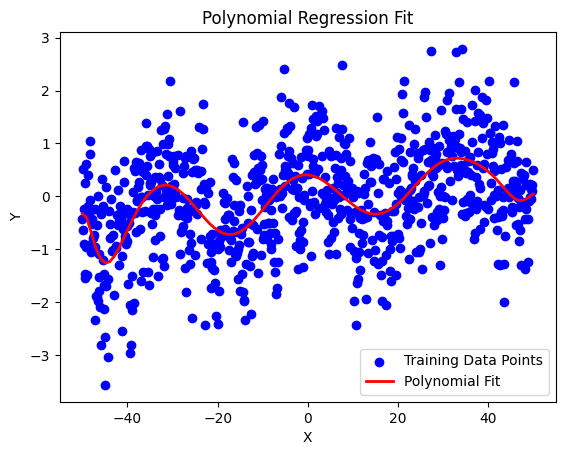

In [ ]:
original_x_train_for_plot = scaler.inverse_transform(x_train[:, 1].reshape(-1, 1))
plt.scatter(original_x_train_for_plot, y_train, color="blue", label="Training Data Points")
X_line_original_scale = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
X_line_scaled = scaler.transform(X_line_original_scale)
X_line_poly = poly.transform(X_line_scaled)
y_line = model.predict(X_line_poly)

plt.plot(X_line_original_scale, y_line, color="red", linewidth=2, label="Polynomial Fit")
plt.title("Polynomial Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()